In [8]:
source("part_of_backlog_predictions.R")
source("part_of_backlog_evaluation.R")

if (!require(forecast)){
    installed <- T
    install.packages("forecast")
}
if (!require(dplyr)){
    install.packages("dplyr")
    require(dplyr)
}
install.packages("stats")
require(stats)

if (!require(effsize)){
    install.packages("effsize")
    require(effsize)
}


Warning message:
“package ‘stats’ is not available (for R version 3.5.1)”Warning message:
“package ‘stats’ is a base package, and should not be updated”

In [3]:
eclipse_data_tools = c("eclipse", "data_tools")
eclipse_platform = c("eclipse", "platform")
eclipse_birt = c("eclipse", "birt")
eclipse_jdt = c("eclipse", "jdt")
eclipse_pde = c("eclipse", "pde")

mozilla_calendar = c("mozilla", "calendar")
mozilla_firefox = c("mozilla", "firefox")
mozilla_core = c("mozilla", "core")
mozilla_thunderbird = c("mozilla", "thunderbird")

kernel_io_storage = c("kernel", "IO_Storage")
kernel_networking = c("kernel", "networking")
kernel_file_system = c("kernel", "file_system")

open_office_writer = c("open_office", "writer")
open_office_calc = c("open_office", "calc")
open_office_draw = c("open_office", "draw")

apache_ant = c("apache", "ant")
apache_apache2 = c("apache", "apache2")

libre_office_writer = c("libre_office", "writer")
libre_office_calc = c("libre_office", "calc")
libre_office_draw = c("libre_office", "draw")

products = rbind(
                 kernel_networking,
                 eclipse_platform,
                 eclipse_data_tools,
                 eclipse_birt,
                 eclipse_jdt,
                 eclipse_pde,
                 mozilla_calendar,
                 mozilla_firefox,
                 mozilla_core,
                 mozilla_thunderbird,
                 kernel_io_storage,
                 kernel_file_system,
                 open_office_writer,
                 open_office_calc,
                 open_office_draw,
                 apache_ant,
                 apache_apache2,
                 libre_office_writer,
                 libre_office_calc,
                 libre_office_draw)  

In [115]:
divide_and_predict <- function(product) {
    backlog = read.csv(file=paste("data/", product[1], "/", product[2], "/", product[1], "_", product[2], "_backlog.csv", sep=""), header=TRUE, sep=",")
    backlog_all = backlog$backlog_all
    backlog_all_diff = abs(diff(backlog_all))
    percentil_value = quantile(backlog_all_diff, probs = 0.995)[[1]]
    big_differences = backlog_all_diff[backlog_all_diff>percentil_value]
    split_points = c()

    for(i in 1:length(big_differences)){
        diff = big_differences[i]
        point = match(diff, backlog_all_diff)
        split_points = c(split_points, point)
        split_points = sort(split_points)
    }
    print(split_points)
    period_start = 0
    for(i in 1:length(split_points)){
        period_end = split_points[i]
        if (period_end - period_start>5){
            backlog_part = backlog %>% filter (number>=period_start & number<period_end) 
            part_of_backlog_all_predictions(product, backlog_part)
        }
        if(i == length(split_points)){
            backlog_last_week = tail(backlog$number, n=1)
            if(backlog_last_week-period_end>5){
                backlog_last_part = backlog %>% filter (number>period_end)   
                part_of_backlog_all_predictions(product, backlog_last_part)
            }
        }
        period_start = period_end
    }
 }

In [109]:
for(i in 1:nrow(products)){
    divide_and_predict(products[i,])
}

[1] 296 297 482 486 573
[1] 1
[1] 4
[1] 9
[1] 15
[1] 17
[1] 22
[1] 27
[1] 33
[1] 34
[1] 41
[1] 44
[1] 47
[1] 52
[1] 59
[1] 63
[1] 65
[1] 72
[1] 75
[1] 78
[1] 85
[1] 89
[1] 94
[1] 96
[1] 102
[1] 107
[1] 110
[1] 116
[1] 120
[1] 123
[1] 125
[1] 130
[1] 135
[1] 141
[1] 145
[1] 149
[1] 154
[1] 157
[1] 161
[1] 168
[1] 172
[1] 174
[1] 180
[1] 185
[1] 187
[1] 191
[1] 197
[1] 200
[1] 204
[1] 210
[1] 212
[1] 218
[1] 224
[1] 227
[1] 233
[1] 234
[1] 241
[1] 244
[1] 249
[1] 255
[1] 256
[1] 262
[1] 264
[1] 269
[1] 273
[1] 278
[1] 284
[1] 288
[1] 290
[1] 1
[1] 4
[1] 9
[1] 15
[1] 17
[1] 22
[1] 27
[1] 33
[1] 34
[1] 41
[1] 44
[1] 47
[1] 52
[1] 59
[1] 63
[1] 65
[1] 72
[1] 75
[1] 78
[1] 85
[1] 89
[1] 94
[1] 96
[1] 102
[1] 107
[1] 110
[1] 116
[1] 120
[1] 123
[1] 125
[1] 130
[1] 135
[1] 141
[1] 145
[1] 149
[1] 154
[1] 157
[1] 161
[1] 168
[1] 172
[1] 174
[1] 180
[1] 185
[1] 187
[1] 191
[1] 197
[1] 200
[1] 204
[1] 210
[1] 212
[1] 218
[1] 224
[1] 227
[1] 233
[1] 234
[1] 241
[1] 244
[1] 249
[1] 255
[1] 256
[1] 

In [11]:
for(i in 1:nrow(products)){
    evaluate_divided_backlog_errors(products[i,], "ericsson")
}

Warning message in wilcox.test.default(ericsson_n_error, ericsson_errors, paired = TRUE):
“cannot compute exact p-value with zeroes”Warning message in wilcox.test.default(ericsson_n_error, ericsson_errors, paired = TRUE):
“cannot compute exact p-value with zeroes”Warning message in wilcox.test.default(ericsson_n_error, ericsson_errors, paired = TRUE):
“cannot compute exact p-value with zeroes”Warning message in wilcox.test.default(ericsson_n_error, ericsson_errors, paired = TRUE):
“cannot compute exact p-value with zeroes”Warning message in wilcox.test.default(ericsson_n_error, ericsson_errors, paired = TRUE):
“cannot compute exact p-value with zeroes”Warning message in wilcox.test.default(ericsson_n_error, ericsson_errors, paired = TRUE):
“cannot compute exact p-value with zeroes”Warning message in wilcox.test.default(ericsson_n_error, ericsson_errors, paired = TRUE):
“cannot compute exact p-value with zeroes”Warning message in wilcox.test.default(ericsson_n_error, ericsson_errors, pa

In [10]:
result_file_path = read.csv(file="data/libre_office/draw/Predictions/Divided_backlog_predictions/naive_baseline_predictions_comparison.csv", header=TRUE, sep=",")
result_file_path


Method,Error_1,Impr_1,Cliff_delta,Hedges_g,NNT,Wilcoxon_test
arima_th:all,3.24,14.96,negligible,negligible,10.244041,TRUE
ets_th:all,3.63,4.72,negligible,negligible,35.531496,FALSE
ericsson,3.32,12.86,small,negligible,8.195733,FALSE
naive,3.81,0.00,NA,NA,NA,FALSE


In [20]:
result_file_path = read.csv(file="data/libre_office/draw/Predictions/Divided_backlog_predictions/ericsson_baseline_predictions_comparison.csv", header=TRUE, sep=",")
result_file_path

Method,Error_1,Impr_1,Cliff_delta,Hedges_g,Wilcoxon_test
arima_th:all,3.24,14.96,negligible,negligible,FALSE
ets_th:all,3.63,4.72,negligible,negligible,FALSE
ericsson,3.32,12.86,negligible,negligible,NA
naive,3.81,0.00,NA,NA,FALSE


# Backlogs poorly predicted division

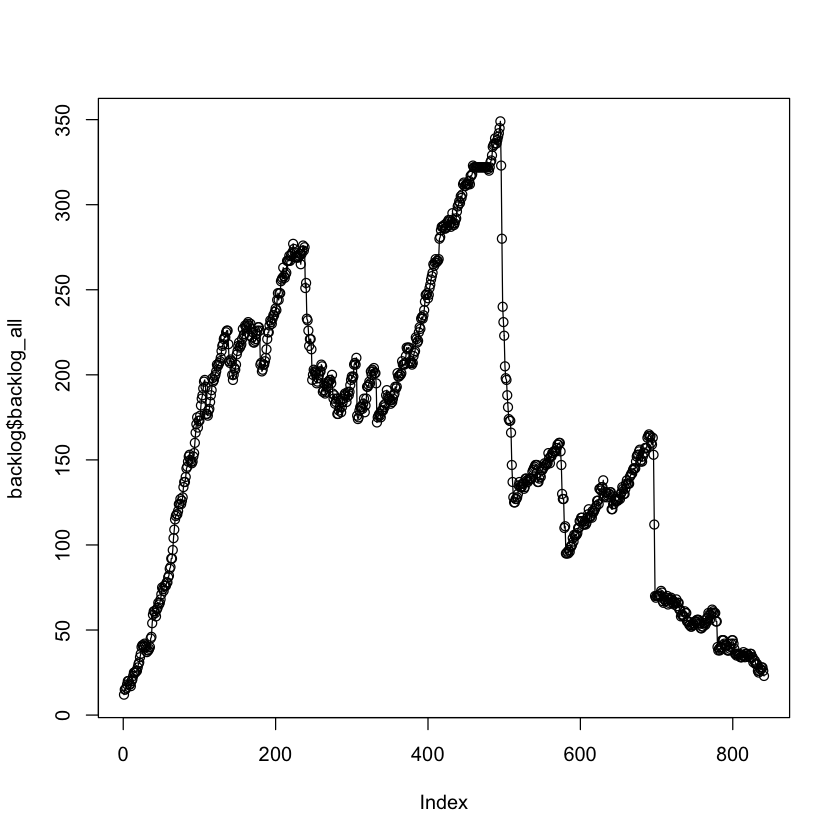

In [2]:
#KERNEL IO_STORAGE
backlog = read.csv(file="data/Kernel/IO_storage/kernel_IO_storage_backlog.csv", header=TRUE, sep=",")
plot(backlog$backlog_all)
lines(backlog$backlog_all)

end_of_first_part = backlog %>% filter (backlog_all == max(backlog$backlog_all)) #494
start_of_second_part = backlog %>% filter (backlog_all == 147 & number == 509) #509
end_of_second_part = backlog %>% filter (backlog_all == 153) #695
start_of_third_part = backlog %>% filter (number == 697) #695

#2 czesci
backlog_first_part = backlog %>% filter (number<495)
backlog_second_part = backlog %>% filter (number>509)

# plot(backlog_third_part$backlog_all)
# lines(backlog_third_part$backlog_all)

# 3 czesci
# backlog_first_part = backlog %>% filter (number<495)
# backlog_second_part = backlog %>% filter (number>509 & number<695)
# backlog_third_part = backlog %>% filter (number>696)

In [103]:
part_of_backlog_all_predictions(c("kernel", "io_storage"), backlog_first_part)

[1] 3
[1] 8
[1] 12
[1] 20
[1] 22
[1] 26
[1] 31
[1] 34
[1] 40
[1] 44
[1] 49
[1] 51
[1] 55
[1] 61
[1] 67
[1] 68
[1] 73
[1] 80
[1] 82
[1] 86
[1] 90
[1] 97
[1] 101
[1] 105
[1] 110
[1] 115
[1] 119
[1] 123
[1] 127
[1] 133
[1] 136
[1] 140
[1] 142
[1] 150
[1] 152
[1] 156
[1] 161
[1] 165
[1] 169
[1] 174
[1] 177
[1] 182
[1] 187
[1] 190
[1] 197
[1] 201
[1] 204
[1] 210
[1] 215
[1] 220
[1] 221
[1] 225
[1] 233
[1] 234
[1] 238
[1] 242
[1] 248
[1] 252
[1] 256
[1] 261
[1] 265
[1] 271
[1] 274
[1] 277
[1] 284
[1] 286
[1] 292
[1] 297
[1] 302
[1] 305
[1] 310
[1] 314
[1] 318
[1] 321
[1] 326
[1] 333
[1] 337
[1] 340
[1] 342
[1] 348
[1] 353
[1] 356
[1] 362
[1] 365
[1] 371
[1] 373
[1] 380
[1] 384
[1] 387
[1] 394
[1] 398
[1] 401
[1] 406
[1] 408
[1] 414
[1] 418
[1] 422
[1] 425
[1] 433
[1] 435
[1] 440
[1] 442
[1] 448
[1] 451
[1] 455
[1] 463
[1] 465
[1] 470
[1] 476
[1] 477
[1] 482
[1] 488
[1] 492
[1] 3
[1] 8
[1] 12
[1] 20
[1] 22
[1] 26
[1] 31
[1] 34
[1] 40
[1] 44
[1] 49
[1] 51
[1] 55
[1] 61
[1] 67
[1] 68
[1] 73
[1]

In [28]:
evaluate_divided_backlog_errors(c("kernel", "io_storage"))

In [29]:
# **** tylko dla 1 czesci
result_file_path = read.csv(file="data/kernel/io_storage/Predictions/Divided_backlog_predictions/errors_evaluation.csv", header=TRUE, sep=",")
result_file_path

Method,Error_1,Impr_1,Cliff_delta,Hedges_g,Wilcoxon_test
arima_th:all,2.82,-0.71,negligible,negligible,FALSE
ets_th:all,2.81,-0.36,negligible,negligible,FALSE
ericsson,3.25,-16.07,negligible,negligible,FALSE
naive,2.80,0.00,NA,NA,FALSE


In [96]:
# dla 2 czesci
result_file_path = read.csv(file="data/kernel/io_storage/Predictions/Divided_backlog_predictions/errors_evaluation.csv", header=TRUE, sep=",")
result_file_path

,arima_th.all,ets.all,ericsson,naive
mean_errors,2.58,2.54,2.98,2.47
improvements,-4.45,-2.83,-20.65,0.00


In [89]:
# dla 3 czesci
result_file_path = read.csv(file="data/kernel/io_storage/Predictions/Divided_backlog_predictions/errors_evaluation.csv", header=TRUE, sep=",")
result_file_path

,arima_th.all,ets.all,ericsson,naive
mean_errors,2.47,2.45,2.81,2.43
improvements,-1.65,-0.82,-15.64,0.00


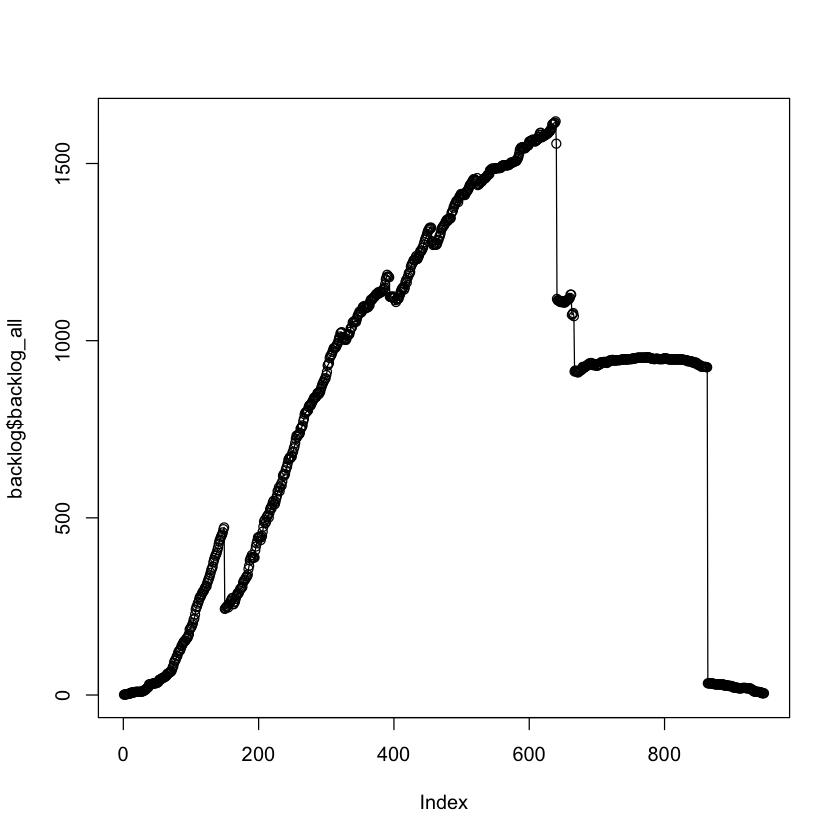

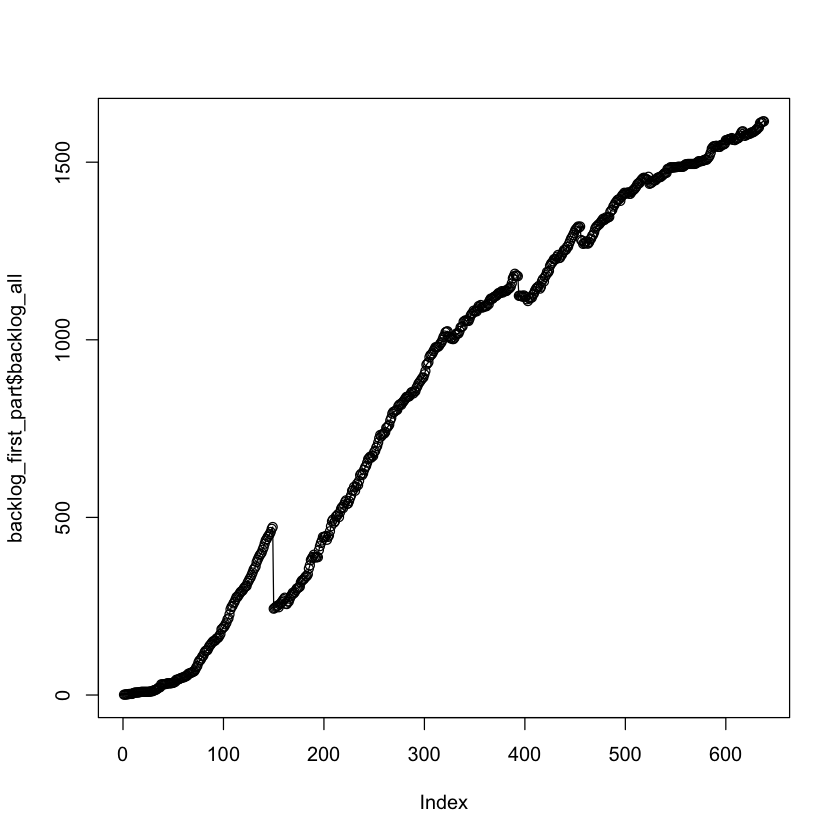

In [114]:
#OPEN OFFICE DRAW
backlog = read.csv(file="data/Open_office/draw/open_office_draw_backlog.csv", header=TRUE, sep=",")

plot(backlog$backlog_all)
lines(backlog$backlog_all)

end_of_first_part = backlog %>% filter (backlog_all == max(backlog$backlog_all)) # 638
backlog_first_part = backlog %>% filter (number<638)

plot(backlog_first_part$backlog_all)
lines(backlog_first_part$backlog_all)


In [115]:
part_of_backlog_all_predictions(c("open_office", "draw"), backlog_first_part)

[1] 3
[1] 6
[1] 11
[1] 14
[1] 20
[1] 23
[1] 30
[1] 34
[1] 36
[1] 40
[1] 45
[1] 52
[1] 54
[1] 58
[1] 64
[1] 67
[1] 73
[1] 78
[1] 80
[1] 83
[1] 87
[1] 95
[1] 98
[1] 101
[1] 107
[1] 109
[1] 116
[1] 118
[1] 122
[1] 130
[1] 131
[1] 137
[1] 141
[1] 144
[1] 148
[1] 155
[1] 157
[1] 164
[1] 168
[1] 173
[1] 175
[1] 179
[1] 186
[1] 190
[1] 192
[1] 200
[1] 204
[1] 208
[1] 209
[1] 216
[1] 218
[1] 225
[1] 230
[1] 234
[1] 235
[1] 242
[1] 245
[1] 251
[1] 255
[1] 258
[1] 264
[1] 266
[1] 274
[1] 275
[1] 282
[1] 283
[1] 290
[1] 295
[1] 299
[1] 303
[1] 305
[1] 310
[1] 315
[1] 318
[1] 325
[1] 327
[1] 333
[1] 338
[1] 342
[1] 345
[1] 350
[1] 354
[1] 358
[1] 362
[1] 367
[1] 372
[1] 376
[1] 379
[1] 385
[1] 391
[1] 394
[1] 400
[1] 401
[1] 405
[1] 410
[1] 416
[1] 421
[1] 426
[1] 430
[1] 432
[1] 435
[1] 442
[1] 445
[1] 451
[1] 456
[1] 458
[1] 462
[1] 467
[1] 472
[1] 475
[1] 481
[1] 483
[1] 490
[1] 494
[1] 499
[1] 502
[1] 506
[1] 513
[1] 516
[1] 518
[1] 524
[1] 528
[1] 534
[1] 537
[1] 541
[1] 545
[1] 551
[1] 556
[

In [30]:
evaluate_divided_backlog_errors(c("open_office", "draw"))

In [31]:
#### tylko dla 1 czesci
result_file_path = read.csv(file="data/open_office/draw/Predictions/Divided_backlog_predictions/errors_evaluation.csv", header=TRUE, sep=",")
result_file_path

Method,Error_1,Impr_1,Cliff_delta,Hedges_g,Wilcoxon_test
arima_th:all,3.04,18.50,negligible,small,TRUE
ets_th:all,3.03,18.77,negligible,small,TRUE
ericsson,3.44,7.77,negligible,negligible,FALSE
naive,3.73,0.00,NA,NA,FALSE


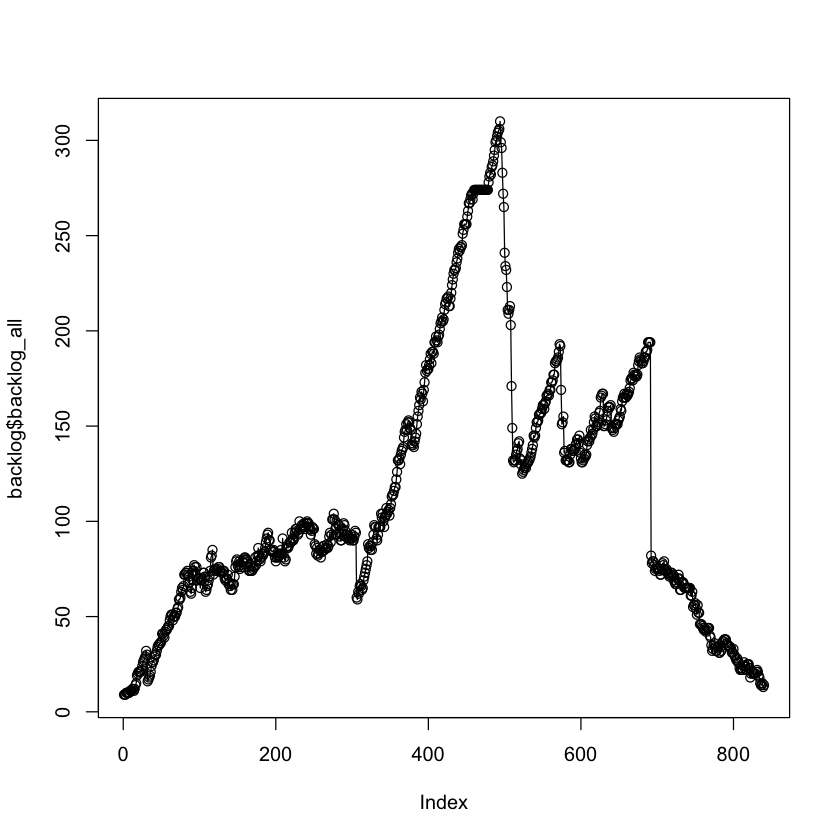

In [131]:
#KERNEL NETWORKING
backlog = read.csv(file="data/kernel/networking/kernel_networking_backlog.csv", header=TRUE, sep=",")

plot(backlog$backlog_all)
lines(backlog$backlog_all)

end_of_first_part = backlog %>% filter (backlog_all == max(backlog$backlog_all)) # 493
start_of_last_part = backlog %>% filter (number > 691)

backlog_first_part = backlog %>% filter (number<493)
backlog_last_part = backlog %>% filter (number>691)

In [132]:
part_of_backlog_all_predictions(c("kernel", "networking"), backlog_last_part)

[1] 697
[1] 698
[1] 703
[1] 709
[1] 711
[1] 719
[1] 721
[1] 724
[1] 731
[1] 734
[1] 738
[1] 744
[1] 747
[1] 752
[1] 758
[1] 761
[1] 763
[1] 769
[1] 773
[1] 778
[1] 783
[1] 786
[1] 793
[1] 796
[1] 801
[1] 805
[1] 808
[1] 814
[1] 817
[1] 823
[1] 827
[1] 829
[1] 834
[1] 837
[1] 697
[1] 698
[1] 703
[1] 709
[1] 711
[1] 719
[1] 721
[1] 724
[1] 731
[1] 734
[1] 738
[1] 744
[1] 747
[1] 752
[1] 758
[1] 761
[1] 763
[1] 769
[1] 773
[1] 778
[1] 783
[1] 786
[1] 793
[1] 796
[1] 801
[1] 805
[1] 808
[1] 814
[1] 817
[1] 823
[1] 827
[1] 829
[1] 834
[1] 837


In [32]:
evaluate_divided_backlog_errors(c("kernel", "networking"))

Warning message in wilcox.test.default(arima_n_error, arima_errors, paired = TRUE):
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(arima_n_error, arima_errors, paired = TRUE):
“cannot compute exact p-value with zeroes”Warning message in wilcox.test.default(ets_n_error, ets_errors, paired = TRUE):
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(ets_n_error, ets_errors, paired = TRUE):
“cannot compute exact p-value with zeroes”

In [126]:
# tylko dla 1 czesci
result_file_path = read.csv(file="data/kernel/networking/Predictions/Divided_backlog_predictions/errors_evaluation.csv", header=TRUE, sep=",")
result_file_path

,arima_th.all,ets.all,ericsson,naive
mean_errors,1.87,1.83,2.28,1.83
improvements,-2.19,0.00,-24.59,0.00


In [33]:
# Dla 1 i ostatniej czesci
result_file_path = read.csv(file="data/kernel/networking/Predictions/Divided_backlog_predictions/errors_evaluation.csv", header=TRUE, sep=",")
result_file_path


Method,Error_1,Impr_1,Cliff_delta,Hedges_g,Wilcoxon_test
arima_th:all,1.79,-1.13,negligible,negligible,FALSE
ets_th:all,1.80,-1.69,negligible,negligible,FALSE
ericsson,2.28,-28.81,small,small,TRUE
naive,1.77,0.00,NA,NA,FALSE


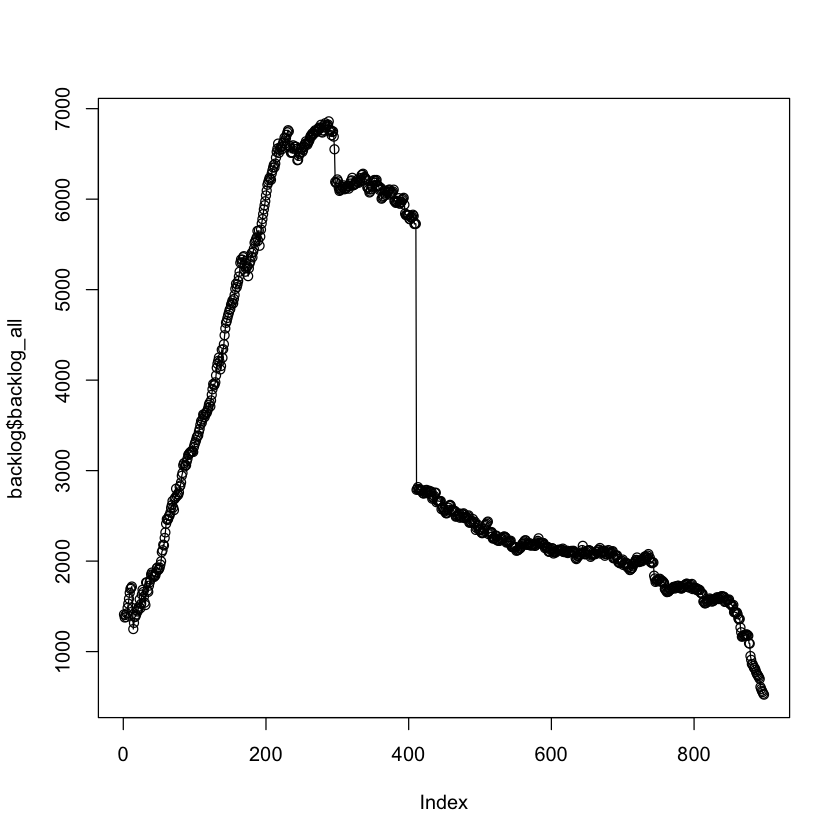

In [12]:
# Eclipse jdt
backlog = read.csv(file="data/eclipse/jdt/eclipse_jdt_backlog.csv", header=TRUE, sep=",")
plot(backlog$backlog_all)
lines(backlog$backlog_all)
backlog_first_part = backlog %>% filter (number < 409)
backlog_second_part = backlog %>% filter (number > 409)


In [14]:
part_of_backlog_all_predictions(c("eclipse", "jdt"), backlog_second_part)

[1] 414
[1] 419
[1] 424
[1] 425
[1] 430
[1] 435
[1] 441
[1] 443
[1] 449
[1] 453
[1] 455
[1] 462
[1] 464
[1] 469
[1] 473
[1] 478
[1] 485
[1] 487
[1] 491
[1] 497
[1] 501
[1] 503
[1] 509
[1] 512
[1] 518
[1] 524
[1] 525
[1] 532
[1] 534
[1] 539
[1] 542
[1] 546
[1] 551
[1] 556
[1] 563
[1] 565
[1] 570
[1] 572
[1] 577
[1] 583
[1] 587
[1] 590
[1] 595
[1] 601
[1] 606
[1] 608
[1] 612
[1] 618
[1] 620
[1] 626
[1] 629
[1] 636
[1] 640
[1] 644
[1] 646
[1] 653
[1] 657
[1] 661
[1] 664
[1] 668
[1] 676
[1] 679
[1] 682
[1] 687
[1] 693
[1] 694
[1] 698
[1] 703
[1] 708
[1] 712
[1] 718
[1] 724
[1] 728
[1] 729
[1] 737
[1] 741
[1] 742
[1] 748
[1] 752
[1] 758
[1] 760
[1] 765
[1] 769
[1] 775
[1] 779
[1] 783
[1] 787
[1] 790
[1] 796
[1] 800
[1] 803
[1] 809
[1] 813
[1] 817
[1] 821
[1] 827
[1] 832
[1] 836
[1] 839
[1] 844
[1] 846
[1] 853
[1] 858
[1] 861
[1] 864
[1] 869
[1] 873
[1] 880
[1] 884
[1] 889
[1] 891
[1] 894
[1] 414
[1] 419
[1] 424
[1] 425
[1] 430
[1] 435
[1] 441
[1] 443
[1] 449
[1] 453
[1] 455
[1] 462
[1] 464


In [16]:
evaluate_divided_backlog_errors(c("eclipse", "jdt"))

In [17]:
# Podzial na 2 czesci
result_file_path = read.csv(file="data/eclipse/jdt/Predictions/Divided_backlog_predictions/errors_evaluation.csv", header=TRUE, sep=",")
result_file_path


Method,Error_1,Impr_1,Cliff_delta,Hedges_g,Wilcoxon_test
arima_th:all,22.49,4.86,negligible,negligible,FALSE
ets_th:all,21.34,9.73,negligible,negligible,TRUE
ericsson,25.99,-9.94,negligible,negligible,FALSE
naive,23.64,0.00,NA,NA,FALSE


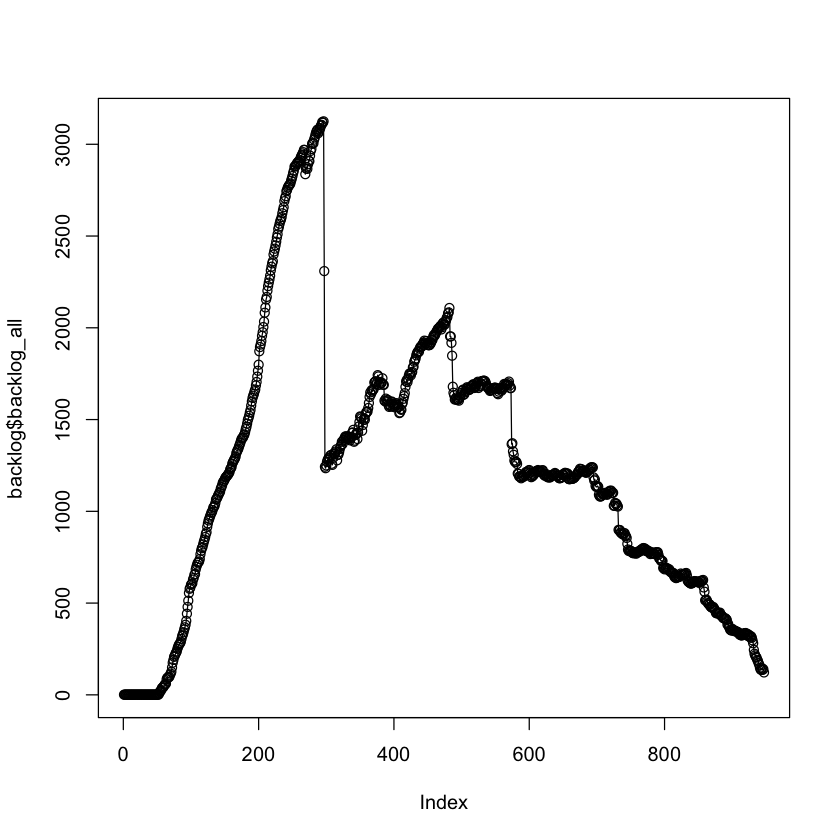

In [26]:
# Mozilla calendar
backlog = read.csv(file="data/mozilla/calendar/mozilla_calendar_backlog.csv", header=TRUE, sep=",")
plot(backlog$backlog_all)
lines(backlog$backlog_all)
backlog_first_part = backlog %>% filter (number < 295)
backlog_second_part = backlog %>% filter (number > 296)


In [28]:
part_of_backlog_all_predictions(c("mozilla", "calendar"), backlog_second_part)

[1] 299
[1] 305
[1] 308
[1] 314
[1] 319
[1] 321
[1] 327
[1] 330
[1] 336
[1] 342
[1] 343
[1] 349
[1] 352
[1] 357
[1] 363
[1] 368
[1] 370
[1] 375
[1] 381
[1] 384
[1] 388
[1] 390
[1] 396
[1] 401
[1] 404
[1] 408
[1] 414
[1] 420
[1] 424
[1] 429
[1] 430
[1] 436
[1] 440
[1] 443
[1] 449
[1] 455
[1] 456
[1] 460
[1] 468
[1] 472
[1] 476
[1] 481
[1] 484
[1] 489
[1] 491
[1] 498
[1] 501
[1] 506
[1] 510
[1] 513
[1] 518
[1] 524
[1] 528
[1] 531
[1] 537
[1] 540
[1] 546
[1] 547
[1] 553
[1] 559
[1] 562
[1] 565
[1] 569
[1] 574
[1] 577
[1] 583
[1] 587
[1] 594
[1] 595
[1] 603
[1] 606
[1] 611
[1] 616
[1] 619
[1] 624
[1] 626
[1] 631
[1] 637
[1] 639
[1] 646
[1] 649
[1] 654
[1] 656
[1] 663
[1] 667
[1] 670
[1] 673
[1] 679
[1] 683
[1] 690
[1] 691
[1] 698
[1] 701
[1] 705
[1] 710
[1] 716
[1] 717
[1] 722
[1] 728
[1] 733
[1] 735
[1] 738
[1] 744
[1] 749
[1] 754
[1] 759
[1] 762
[1] 765
[1] 771
[1] 776
[1] 780
[1] 783
[1] 789
[1] 793
[1] 795
[1] 803
[1] 804
[1] 811
[1] 816
[1] 817
[1] 824
[1] 826
[1] 831
[1] 834
[1] 841


In [29]:
evaluate_divided_backlog_errors(c("mozilla", "calendar"))

In [30]:
# Podzial na 2 czesci
result_file_path = read.csv(file="data/mozilla/calendar/Predictions/Divided_backlog_predictions/errors_evaluation.csv", header=TRUE, sep=",")
result_file_path

Method,Error_1,Impr_1,Cliff_delta,Hedges_g,Wilcoxon_test
arima_th:all,8.13,18.7,negligible,negligible,TRUE
ets_th:all,7.75,22.5,small,small,TRUE
ericsson,8.30,17.0,negligible,negligible,TRUE
naive,10.00,0.0,NA,NA,FALSE


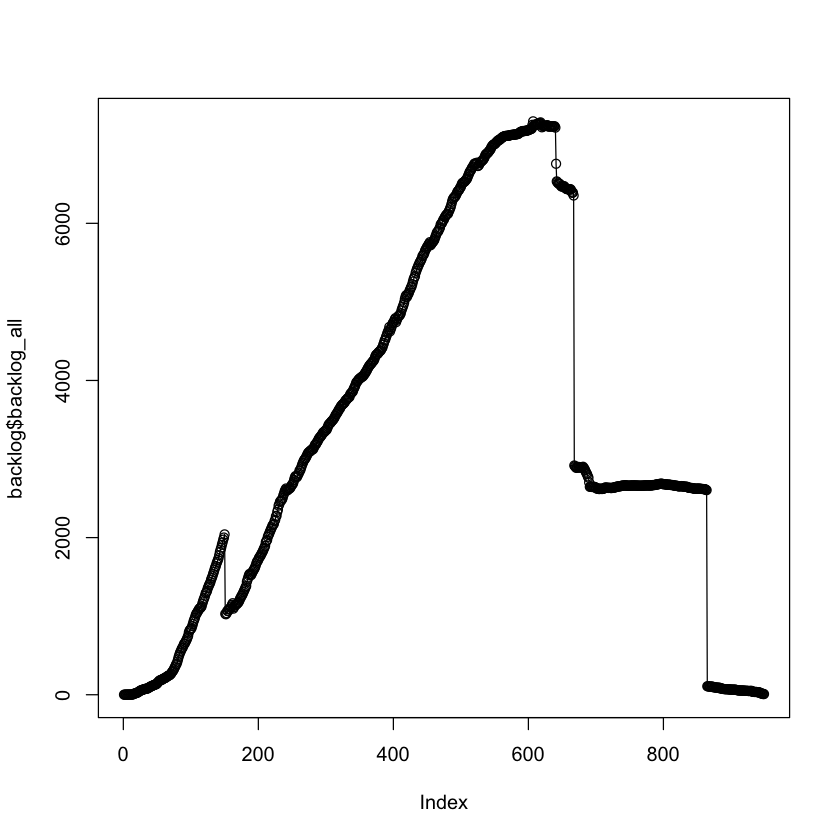

In [35]:
# Open office calc
backlog = read.csv(file="data/open_office/calc/open_office_calc_backlog.csv", header=TRUE, sep=",")
plot(backlog$backlog_all)
lines(backlog$backlog_all)
backlog_first_part = backlog %>% filter (number < 639)


In [39]:
part_of_backlog_all_predictions(c("open_office", "calc"), backlog_first_part)

[1] 1
[1] 4
[1] 8
[1] 11
[1] 18
[1] 22
[1] 24
[1] 30
[1] 32
[1] 38
[1] 43
[1] 48
[1] 52
[1] 55
[1] 62
[1] 66
[1] 67
[1] 73
[1] 77
[1] 81
[1] 86
[1] 89
[1] 95
[1] 100
[1] 105
[1] 106
[1] 112
[1] 118
[1] 121
[1] 126
[1] 128
[1] 132
[1] 137
[1] 141
[1] 148
[1] 153
[1] 154
[1] 161
[1] 164
[1] 170
[1] 173
[1] 178
[1] 181
[1] 185
[1] 191
[1] 193
[1] 200
[1] 203
[1] 208
[1] 214
[1] 217
[1] 219
[1] 226
[1] 231
[1] 232
[1] 239
[1] 243
[1] 248
[1] 251
[1] 254
[1] 260
[1] 263
[1] 268
[1] 272
[1] 279
[1] 280
[1] 285
[1] 290
[1] 294
[1] 301
[1] 304
[1] 309
[1] 310
[1] 315
[1] 319
[1] 326
[1] 331
[1] 335
[1] 339
[1] 341
[1] 347
[1] 349
[1] 356
[1] 358
[1] 363
[1] 370
[1] 374
[1] 377
[1] 382
[1] 385
[1] 391
[1] 394
[1] 397
[1] 404
[1] 407
[1] 412
[1] 418
[1] 422
[1] 427
[1] 431
[1] 433
[1] 437
[1] 441
[1] 448
[1] 453
[1] 455
[1] 460
[1] 463
[1] 470
[1] 471
[1] 478
[1] 482
[1] 486
[1] 489
[1] 495
[1] 497
[1] 503
[1] 509
[1] 512
[1] 517
[1] 520
[1] 527
[1] 529
[1] 533
[1] 539
[1] 542
[1] 548
[1] 553
[1

In [40]:
evaluate_divided_backlog_errors(c("open_office", "calc"))

In [41]:
# Dla 1 czesci
result_file_path = read.csv(file="data/open_office/calc/Predictions/Divided_backlog_predictions/errors_evaluation.csv", header=TRUE, sep=",")
result_file_path

Method,Error_1,Impr_1,Cliff_delta,Hedges_g,Wilcoxon_test
arima_th:all,7.72,46.83,medium,medium,TRUE
ets_th:all,8.48,41.60,medium,medium,TRUE
ericsson,9.85,32.16,medium,small,TRUE
naive,14.52,0.00,NA,NA,FALSE
